## Chapter 5

### LIME and SHAP
#### Here we will look at Perturbation methods, SHAP for a Linear model

##### We will look at Local interpretability provided for individual predictions 

We will be observing and interpreting the models using post hoc method 
SHAP <br>

We use the diabetes dataset from sklearn <br>

We are using the sklearn diabetes datasets. More details on the dataset can be found here <br>
 https://scikit-learn.org/stable/datasets/toy_dataset.html#diabetes-dataset


|**age**|age in years|
|-------|------------|
|**sex**|gender|
|**bmi**|body mass index|
|**bp** | average blood pressure |
| **s1** | tc, total serum cholesterol |
| **s2**  | ldl, low-density lipoproteins |
| **s3**  | hdl, high-density lipoproteins |
| **s4** | tch, total cholesterol / HDL |
| **s5** | ltg, possibly log of serum triglycerides level |
| **s6** | glu, blood sugar level |

**Install the required libraries**

In [ ]:
!pip install shap

**Load the diabetes dataset, train a linear regression mode.**

In [8]:
# 1. Import necessary libraries
import pandas as pd
import numpy as np
from sklearn import linear_model
from sklearn.datasets import load_diabetes
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import shap

# 2. Load the diabetes dataset
diabetes = load_diabetes()

df = pd.DataFrame(data = np.c_[diabetes['data'],diabetes['target']],columns = diabetes.feature_names+['target'])
X, y = df.drop('target',axis=1),df['target']
feature_names = diabetes.feature_names

# 3. Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#X100 = shap.utils.sample(X, 100)  # 100 instances for use as the background distribution

# a simple linear model
model = linear_model.LinearRegression()
model.fit(X, y)


LinearRegression()

**Display the coefficients for each of the features**

In [15]:
print("Model coefficients:\n")
for i in range(X.shape[1]):
    print(feature_names[i], "=", model.coef_[i].round(5))

Model coefficients:

age = -10.00987
sex = -239.81564
bmi = 519.84592
bp = 324.38465
s1 = -792.17564
s2 = 476.73902
s3 = 101.04327
s4 = 177.06324
s5 = 751.2737
s6 = 67.62669


**Run the SHAP explainer function and calculate SHAP values**

In [17]:
explainer = shap.Explainer(model, X)
shap_values = explainer(X)


**Plot the summary graph on shap values and the original dataset values**

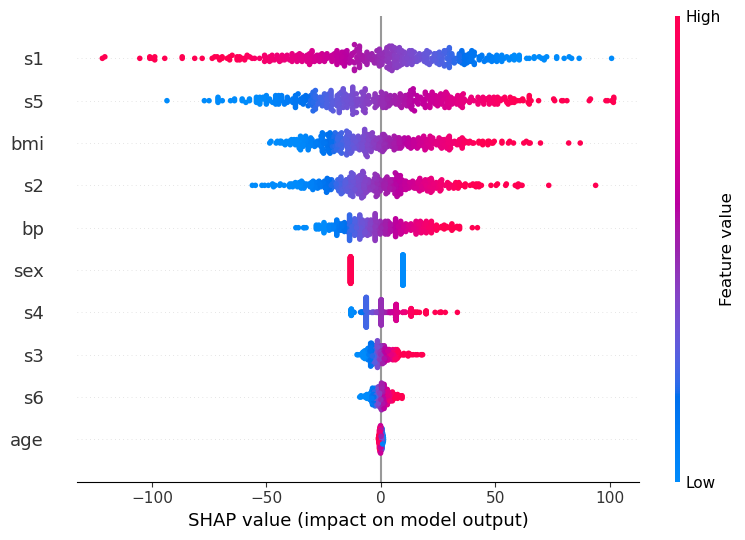

In [18]:
# Summary plot
shap.summary_plot(shap_values, X)


Shapley values explains the gap between the predictions and the actaul values. The above is a summary and hence averages it out across the instances

**Display the bar plot on the shapley values**

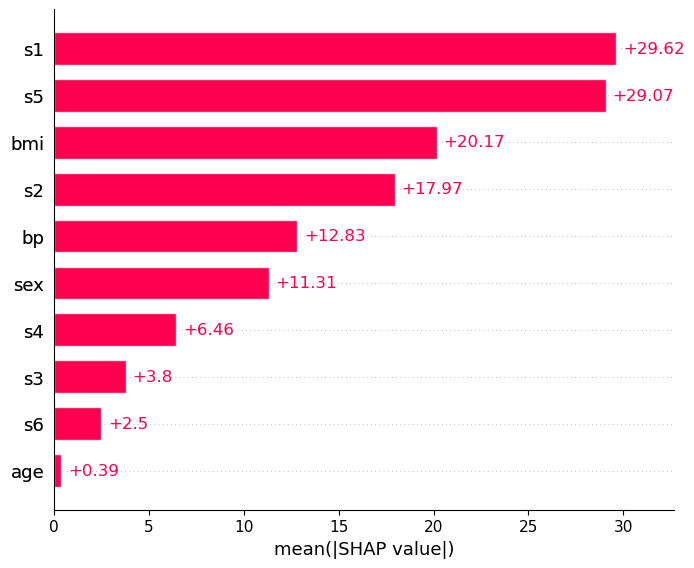

In [19]:
# Bar plot
shap.plots.bar(shap_values)


The bar plot is the mean absolute value of the SHAP values for each feature. It produces stacked bars for multi-class outputs.

**Display the waterfall plot for the first prediction**

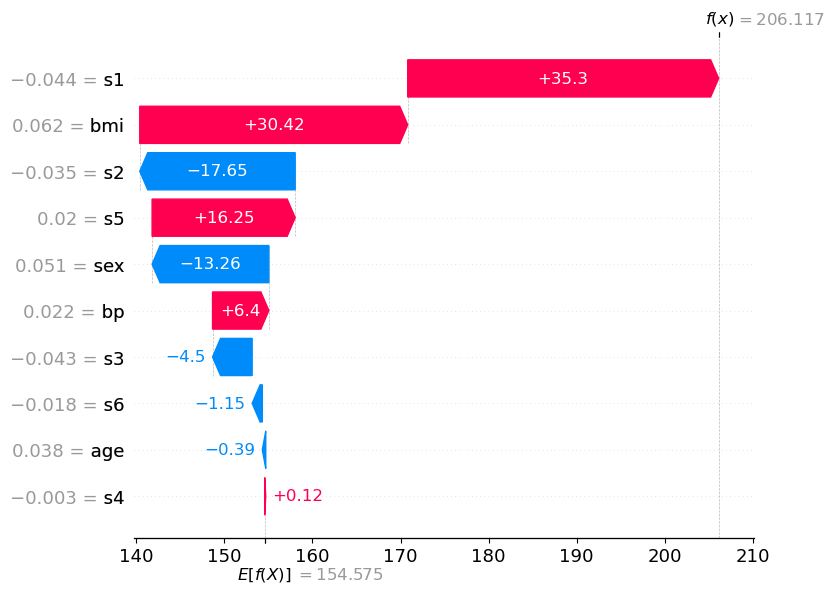

In [20]:
# Waterfall plot for the first prediction
shap.plots.waterfall(shap_values[0])


The plot above shows features each contributing to push the model output from the base value (the average model output over the training dataset) to the model output. The features pushing the prediction higher are shown in red, those pushing the prediction lower are in blue. Force plot is another visualization of the same explanation.

**Force Plot for the first predictions explanation**

In [22]:
shap.initjs()

In [23]:

# Force plot for the first prediction
shap.force_plot(explainer.expected_value, shap_values.values[0,:], X.iloc[0,:])

This is a waterfall from a horizontal perspective. It shows the impact of each feature in attributing the gap between the average and the prediction.

**Plot the violin graph on the shap values**

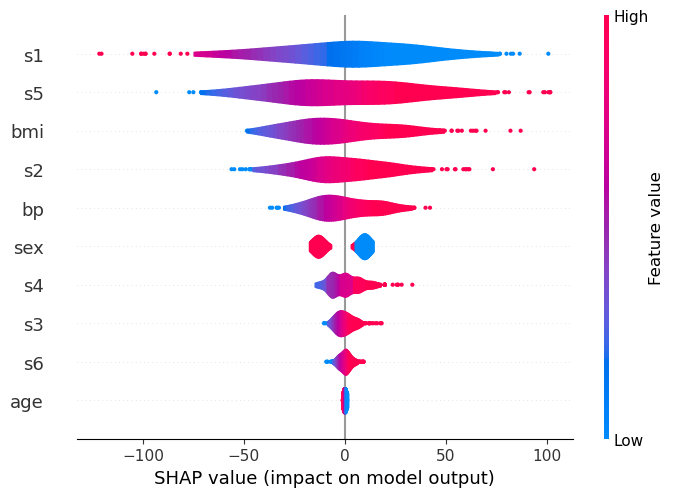

In [25]:
shap.plots.violin(shap_values)

 Violin summary plot is a compact representation of the distribution and variability of SHAP values for each feature.

**Display Heatmap of the shapley values**

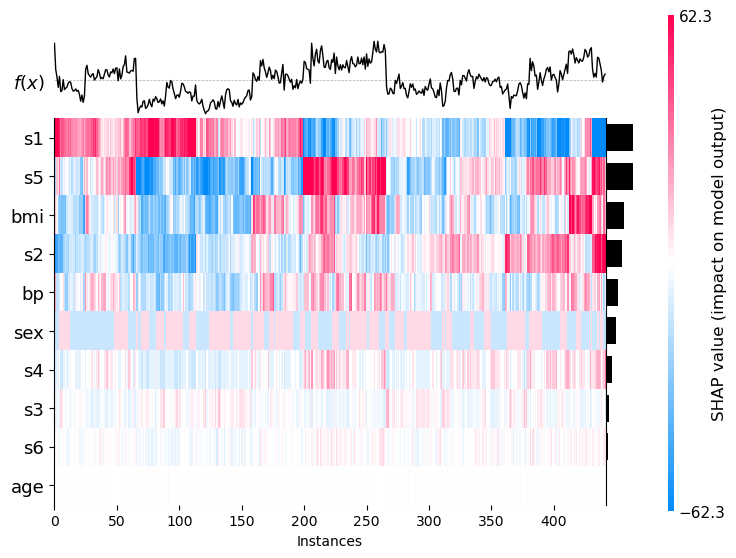

<Axes: xlabel='Instances'>

In [24]:
shap.plots.heatmap(shap_values)

The output of the model is in the heatmap matrix and centered around the explaination’s base value. The global importance of each model input is shown as a bar plot on the right hand side of the plot. By default this is the shap.order.abs.mean measure of overall importance.